In [1]:
%load_ext autoreload
%autoreload 2

In [36]:
from typing import List, Dict, Any
import sys
# import os
sys.path.append('..')
# from wyscout.events import get_key_pass_events
from wyscout.match import get_team_matches
# from wyscout.stats import get_touches_for_player

In [37]:
SOUTHEND = 1687
SEASON_2022 = 188172
J_BRIDGE = 289901
S_HOBSON = 489434

In [4]:
from wyscout.team import get_team_squad
squad = get_team_squad(SOUTHEND, SEASON_2022)
squad = {p["wyId"]: p for p in squad["squad"]}

{k: squad[k]["shortName"] for k in squad}

{850018: 'H. Sandat',
 846283: 'J. Crowhurst',
 844129: 'C. Wreh',
 840510: 'B. Noukeu',
 826164: 'J. Benton',
 807559: 'J. Wood',
 775220: 'C. Andeng Ndi',
 702452: 'T. Adedoja',
 702450: 'O. Coker',
 601997: 'M. Dackers',
 596487: 'T. Clifford',
 592169: 'K. Łopata',
 568783: 'O. Kensdale',
 486667: 'A. Cosgrave',
 12896: 'S. Arnold',
 62769: 'J. Hyde',
 78528: 'J. Demetriou',
 8821: 'R. Murphy',
 10560: 'N. Ralph',
 289901: 'J. Bridge',
 330285: 'H. Cardwell',
 353931: 'H. Taylor',
 356452: 'W. Fonguck',
 404340: 'Noor Husin',
 444130: 'C. Powell',
 447116: 'L. Lomas',
 486095: 'G. Scott-Morriss',
 489434: 'S. Hobson',
 516768: 'C. Miley',
 547377: 'D. Mooney'}

In [5]:
matches = get_team_matches(SOUTHEND, SEASON_2022)
for m in matches["matches"]:
    print(m["matchId"], m["date"], m["label"])

5369039 2022-12-26 16:00:00 Southend United - Bromley, 0-1
5369008 2022-12-10 15:00:00 Boreham Wood - Southend United, 0-0
5369005 2022-12-03 13:30:00 Southend United - Altrincham, 2-2
5368984 2022-11-26 16:00:00 Aldershot Town - Southend United, 2-0
5368977 2022-11-19 16:00:00 Gateshead - Southend United, 3-1
5368968 2022-11-12 16:00:00 Southend United - Dorking Wanderers, 2-0
5368956 2022-11-08 20:45:00 Southend United - Notts County, 2-2
5368829 2022-11-01 20:45:00 Barnet - Southend United, 0-3
5368947 2022-10-29 16:00:00 York City - Southend United, 0-2
5368929 2022-10-25 20:45:00 Maidstone United - Southend United, 0-3
5368922 2022-10-22 16:00:00 Southend United - Scunthorpe United, 3-0
5368902 2022-10-08 13:30:00 Dagenham & Redbridge - Southend United, 1-1
5368898 2022-10-04 20:45:00 Southend United - Woking, 1-1
5368886 2022-10-01 16:00:00 Southend United - Yeovil Town, 1-0
5368871 2022-09-24 16:00:00 Wealdstone - Southend United, 0-1
5368861 2022-09-17 16:00:00 Southend United 

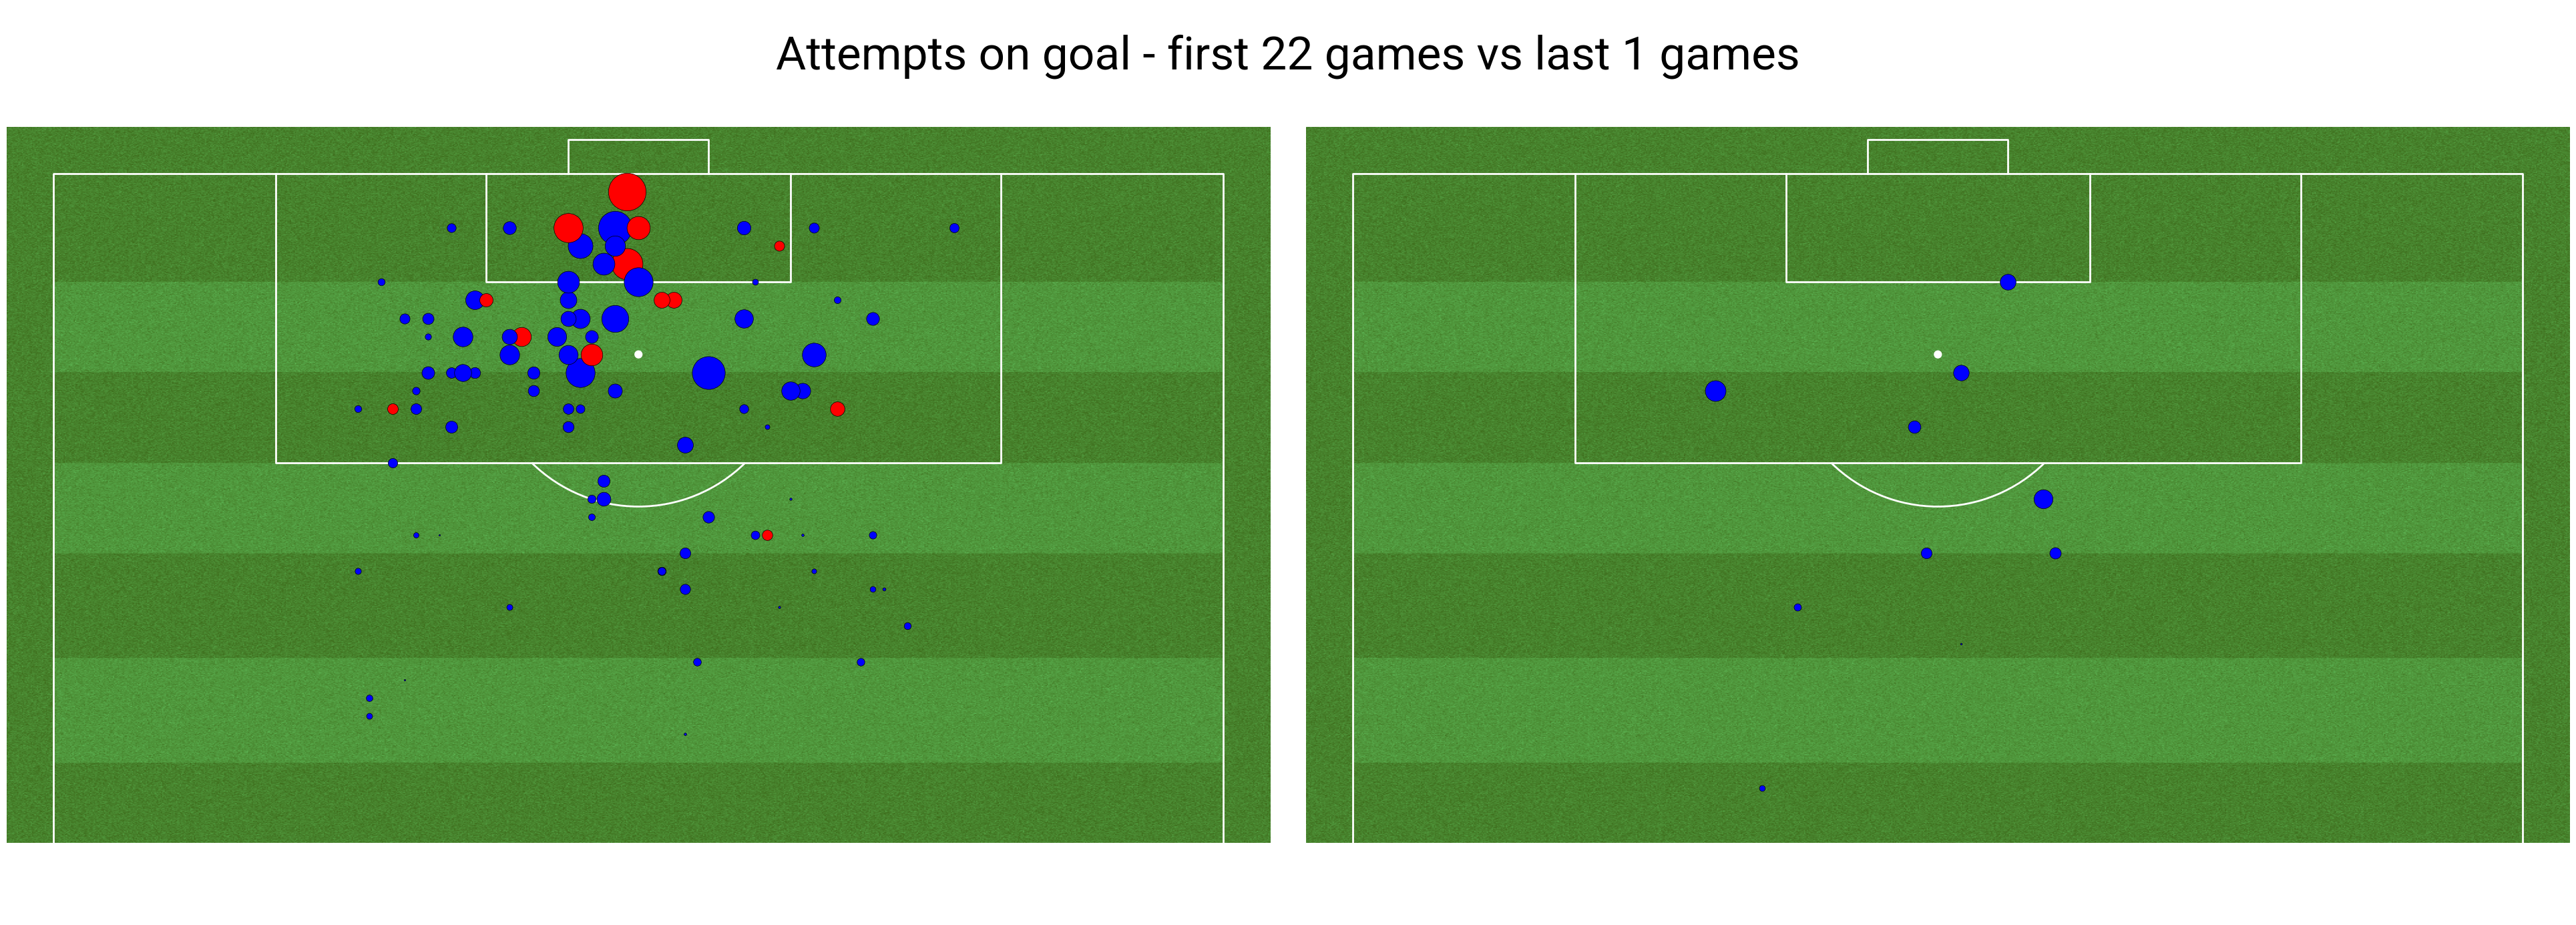

In [8]:
from wyscout.viz.viz import shot_compare_map
shot_compare_map(SOUTHEND, SEASON_2022)

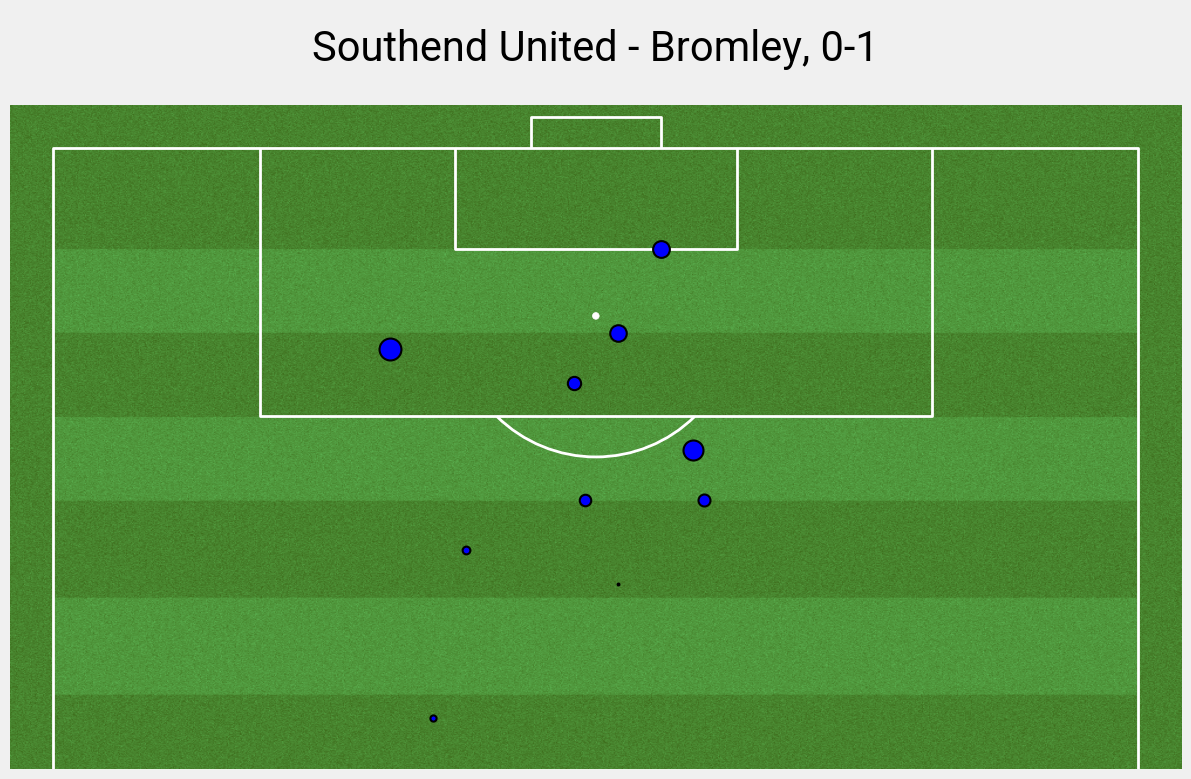

In [9]:
from wyscout.viz.viz import shot_map
shot_map(SOUTHEND, SEASON_2022)

In [56]:

from statistics import mean
from wyscout.viz.data import get_shots, get_key_passes
from wyscout.team import get_team_details
match_events = get_shots(SOUTHEND, SEASON_2022)

attempt_type = ["shot"]

total_shots = 0
total_xg = 0

for i, m in enumerate(match_events[:]):
    md = get_match_details(m["matchId"])
    for k in md["teamsData"]:
        if md["teamsData"][k]["teamId"] == SOUTHEND:
            m["venue"] = "H" if md["teamsData"][k]["side"] == "home" else "H"
            m["goalsFor"] = md["teamsData"][k]["score"]
        else:
            oppo = get_team_details(md["teamsData"][k]["teamId"])
            m["opposition"] = oppo["name"]
            m["goalsAgainst"] = md["teamsData"][k]["score"]
    if m["goalsFor"] > m["goalsAgainst"]:
        m["result"] = "W"
    elif m["goalsFor"] < m["goalsAgainst"]:
        m["result"] = "L"
    else:
        m["result"] = "D"

    m["matchLabel"] = f'{m["opposition"]} ({m["venue"]}) {m["result"]} {m["goalsFor"]}-{m["goalsAgainst"]}'
    shots = [e for e in m["events"] if e["type"]["primary"] in attempt_type]
    m["total_shots"] = len(shots)
    m["average_xg"] = mean([s["shot"]["xg"] for s in shots])
    m["total_xg"] = sum([s["shot"]["xg"] for s in shots])
    total_shots += m["total_shots"]
    total_xg += m["total_xg"]

season_ave_xg = total_xg / total_shots
season_ave_attempts = total_shots / len(match_events)
match_events.reverse()

In [50]:
md = get_match_details(match_events[0]["matchId"])
md.keys()

dict_keys(['wyId', 'label', 'date', 'dateutc', 'status', 'duration', 'winner', 'competitionId', 'seasonId', 'roundId', 'gameweek', 'teamsData', 'venue', 'referees', 'hasDataAvailable'])

In [51]:
for m in match_events:
    print(m["matchId"], m["label"], m["total_shots"], m["goals"], m["average_xg"], m["total_xg"])

5368750 Southend United - Boreham Wood, 0-1 10 0 0.0671554 0.671554
5368764 Solihull Moors - Southend United, 1-1 10 1 0.0558765 0.558765
5368772 Halifax Town - Southend United, 0-0 7 0 0.1546942857142857 1.0828599999999997
5368786 Southend United - Oldham Athletic, 1-0 22 1 0.08991063636363636 1.9780339999999998
5368795 Eastleigh - Southend United, 2-1 9 1 0.06368800000000001 0.573192
5368810 Southend United - Maidenhead United, 2-0 16 2 0.092575625 1.48121
5368825 Southend United - Torquay United, 1-2 28 1 0.10129760714285714 2.8363329999999998
5368843 Chesterfield - Southend United, 3-2 13 2 0.06985930769230769 0.908171
5368861 Southend United - Wrexham, 0-0 13 0 0.0691403076923077 0.898824
5368871 Wealdstone - Southend United, 0-1 15 1 0.20125366666666666 3.0188050000000004
5368886 Southend United - Yeovil Town, 1-0 16 1 0.13650575 2.184092
5368898 Southend United - Woking, 1-1 10 1 0.08374856 0.8374855999999999
5368902 Dagenham & Redbridge - Southend United, 1-1 11 1 0.11981636363

In [52]:
df_match_events = pd.DataFrame(match_events)
df_match_events

matchId                 date                                        label  \
0   5368750  2022-08-06 16:00:00          Southend United - Boreham Wood, 0-1   
1   5368764  2022-08-13 16:00:00        Solihull Moors - Southend United, 1-1   
2   5368772  2022-08-16 20:45:00          Halifax Town - Southend United, 0-0   
3   5368786  2022-08-20 16:00:00       Southend United - Oldham Athletic, 1-0   
4   5368795  2022-08-27 16:00:00             Eastleigh - Southend United, 2-1   
5   5368810  2022-08-29 16:00:00     Southend United - Maidenhead United, 2-0   
6   5368825  2022-09-03 16:00:00        Southend United - Torquay United, 1-2   
7   5368843  2022-09-13 20:45:00          Chesterfield - Southend United, 3-2   
8   5368861  2022-09-17 16:00:00               Southend United - Wrexham, 0-0   
9   5368871  2022-09-24 16:00:00            Wealdstone - Southend United, 0-1   
10  5368886  2022-10-01 16:00:00           Southend United - Yeovil Town, 1-0   
11  5368898  2022-10-04 20:45:00                Southend United - Woking, 1-1   
12  5368902  2022-10-08 13:30:00  Dagenham & Redbridge - Southend United, 1-1   
13  5368922  2022-10-22 16:00:00     Southend United - Scunthorpe United, 3-0   
14  5368929  2022-10-25 20:45:00      Maidstone United - Southend United, 0-3   
15  5368947  2022-10-29 16:00:00             York City - Southend United, 0-2   
16  5368829  2022-11-01 20:45:00                Barnet - Southend United, 0-3   
17  5368956  2022-11-08 20:45:00          Southend United - Notts County, 2-2   
18  5368968  2022-11-12 16:00:00     Southend United - Dorking Wanderers, 2-0   
19  5368977  2022-11-19 16:00:00             Gateshead - Southend United, 3-1   
20  5368984  2022-11-26 16:00:00        Aldershot Town - Southend United, 2-0   
21  5369005  2022-12-03 13:30:00            Southend United - Altrincham, 2-2   
22  5369039  2022-12-26 16:00:00               Southend United - Bromley, 0-1   

                                               events venue  goalsFor  \
0   [{'id': 1344829938, 'matchId': 5368750, 'match...     H         0   
1   [{'id': 1351323684, 'matchId': 5368764, 'match...     H         1   
2   [{'id': 1355068448, 'matchId': 5368772, 'match...     H         0   
3   [{'id': 1367476857, 'matchId': 5368786, 'match...     H         1   
4   [{'id': 1381138699, 'matchId': 5368795, 'match...     H         1   
5   [{'id': 1370714324, 'matchId': 5368810, 'match...     H         2   
6   [{'id': 1386388181, 'matchId': 5368825, 'match...     H         1   
7   [{'id': 1390784120, 'matchId': 5368843, 'match...     H         2   
8   [{'id': 1396154082, 'matchId': 5368861, 'match...     H         0   
9   [{'id': 1407889850, 'matchId': 5368871, 'match...     H         1   
10  [{'id': 1417359314, 'matchId': 5368886, 'match...     H         1   
11  [{'id': 1418224326, 'matchId': 5368898, 'match...     H         1   
12  [{'id': 1422963681, 'matchId': 5368902, 'match...     H         1   
13  [{'id': 1449616709, 'matchId': 5368922, 'match...     H         3   
14  [{'id': 1446483162, 'matchId': 5368929, 'match...     H         3   
15  [{'id': 1450588498, 'matchId': 5368947, 'match...     H         2   
16  [{'id': 1455397464, 'matchId': 5368829, 'match...     H         3   
17  [{'id': 1463390158, 'matchId': 5368956, 'match...     H         2   
18  [{'id': 1467303536, 'matchId': 5368968, 'match...     H         2   
19  [{'id': 1479279952, 'matchId': 5368977, 'match...     H         1   
20  [{'id': 1480580818, 'matchId': 5368984, 'match...     H         0   
21  [{'id': 1492754587, 'matchId': 5369005, 'match...     H         2   
22  [{'id': 1502194049, 'matchId': 5369039, 'match...     H         0   

              opposition  goalsAgainst result                      matchLabel  \
0           Boreham Wood             1      L          Boreham Wood (H) L 0-1   
1         Solihull Moors             1      D        Solihull Moors (H) D 1-1   
2           Halifax Town             0      D          Halifax 

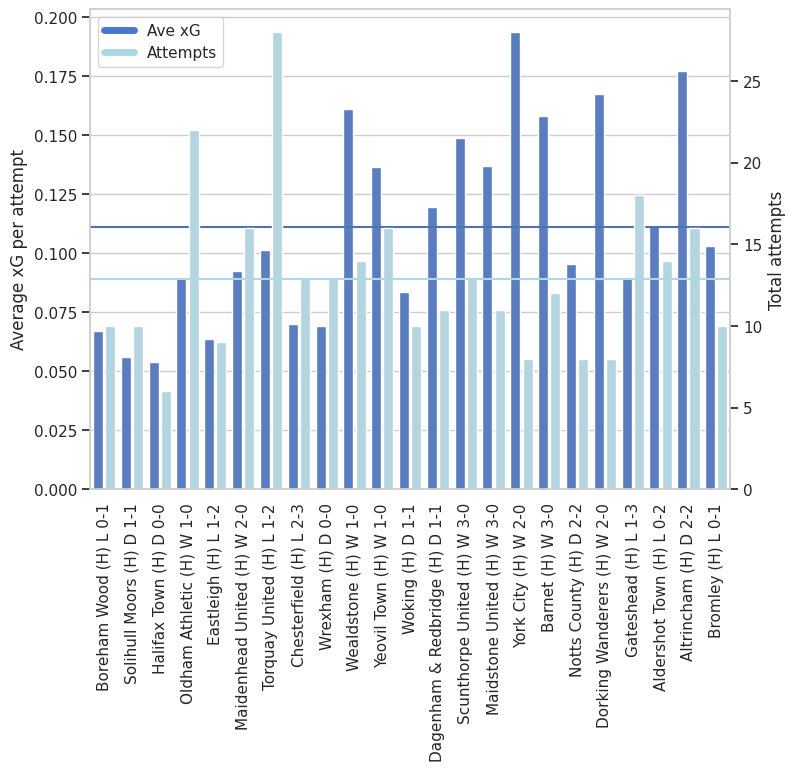

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.lines import Line2D

sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")
sns.set_color_codes("muted")

COLOUR_1 = "b"
COLOUR_2 = "lightblue"

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
df_match_events = pd.DataFrame(match_events)

ax = sns.barplot(x="matchLabel", y="average_xg", data=df_match_events,
            label="Average xG", color=COLOUR_1)

ax.axhline(season_ave_xg)
plt.xticks(rotation=90)
ax.set(ylabel="Average xG per attempt",
       xlabel="")

width_scale = 0.45
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width_scale)

sns.despine(left=True, bottom=True)

ax2 = ax.twinx()
sns.barplot(x="matchLabel", y="total_shots", data=df_match_events, color=COLOUR_2, ax=ax2)

ax2.set(ylabel="Total attempts")
ax2.grid(False)
ax2.axhline(season_ave_attempts, color=COLOUR_2)

for bar in ax2.containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1- width_scale))
    bar.set_width(w * width_scale)

custom_lines = [Line2D([0], [0], color=COLOUR_1, lw=5),
                Line2D([0], [0], color=COLOUR_2, lw=5),]

legend = ax.legend(
    custom_lines, ["Ave xG", 'Attempts'],
    loc="upper left"
)


plt.show()

In [44]:
from wyscout.match import get_match_events, get_team_matches
m = get_match_events(5368829)

In [48]:
set([e["type"]["primary"] for e in m["events"]])

{'acceleration',
 'clearance',
 'corner',
 'duel',
 'free_kick',
 'game_interruption',
 'goal_kick',
 'goalkeeper_exit',
 'infraction',
 'interception',
 'offside',
 'pass',
 'penalty',
 'shot',
 'shot_against',
 'throw_in',
 'touch'}

In [ ]:
def add_team_to_match_details(match_details: Any) -> Any:
    team_ids = list(match_details["teamsData"].keys())
    squads = {
        t: get_team_squad(t, match_details["seasonId"])
        for t in team_ids
    }
    for k in squads.keys():
        squads[k] = {p["wyId"]: p for p in squads[k]["squad"]}
    for t_id in match_details["teamsData"]:
        players = {}
        keys = ["lineup", "bench"]
        for k in keys:
            for p in match_details["teamsData"][t_id]["formation"][k]:
                p["playerDetails"] = squads[t_id][p["playerId"]]
                players[p["playerId"]] = p
        match_details["teamsData"][t_id]["players"] = players
    return match_details


def get_match_details_with_teams(match_id: int) -> Dict[int, Any]:
    match_details = get_match_details(match_id)
    return add_team_to_match_details(match_details)

In [ ]:
match = get_match_details_with_teams(match_events[0]["matchId"])

NameError: name 'get_match_details_with_teams' is not defined

In [13]:
from wyscout.viz.heat_map import plot_player_action_map
from wyscout.viz.arrow import pass_event_to_arrow, ArrowOptions

player_id = 516768 #J_BRIDGE
matches = get_touches_for_player(player_id, SOUTHEND, SEASON_2022)

touches = []
passes = []
for m in matches[:]:
    for t in m["events"]:
        touches.append([t["location"]["x"], t["location"]["y"]])

        if t["type"]["primary"] == "pass":
            passes.append(pass_event_to_arrow(t, []))

plot_player_action_map(touches, passes, squad[player_id], "Touches - 2022/23")

TypeError: plot_player_action_map() missing 2 required positional arguments: 'passes' and 'crosses'

In [11]:
player_id = 844129 #J_BRIDGE
matches = get_touches_for_player(player_id, SOUTHEND, SEASON_2022)

touches = []
passes = []
match = matches[4]
for t in match["events"]:
    touches.append([t["location"]["x"], t["location"]["y"]])

    if t["type"]["primary"] == "pass":
        passes.append(pass_event_to_arrow(t, [], ArrowOptions(
            width=2
        )))

plot_player_action_map(touches, passes, squad[player_id], f'{match["opposition"]}')

NameError: name 'pass_event_to_arrow' is not defined

{850018: 'H. Sandat',
 846283: 'J. Crowhurst',
 844129: 'C. Wreh',
 840510: 'B. Noukeu',
 826164: 'J. Benton',
 807559: 'J. Wood',
 775220: 'C. Andeng Ndi',
 702452: 'T. Adedoja',
 702450: 'O. Coker',
 601997: 'M. Dackers',
 596487: 'T. Clifford',
 592169: 'K. Łopata',
 568783: 'O. Kensdale',
 486667: 'A. Cosgrave',
 12896: 'S. Arnold',
 62769: 'J. Hyde',
 78528: 'J. Demetriou',
 8821: 'R. Murphy',
 10560: 'N. Ralph',
 289901: 'J. Bridge',
 330285: 'H. Cardwell',
 353931: 'H. Taylor',
 356452: 'W. Fonguck',
 404340: 'Noor Husin',
 444130: 'C. Powell',
 447116: 'L. Lomas',
 486095: 'G. Scott-Morriss',
 489434: 'S. Hobson',
 516768: 'C. Miley',
 547377: 'D. Mooney'}

/home/vscode/.cache/pypoetry/virtualenvs/sufc-stats--ixh6ZGa-py3.10/lib/python3.10/site-packages/mplsoccer/_pitch_plot.py:172: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


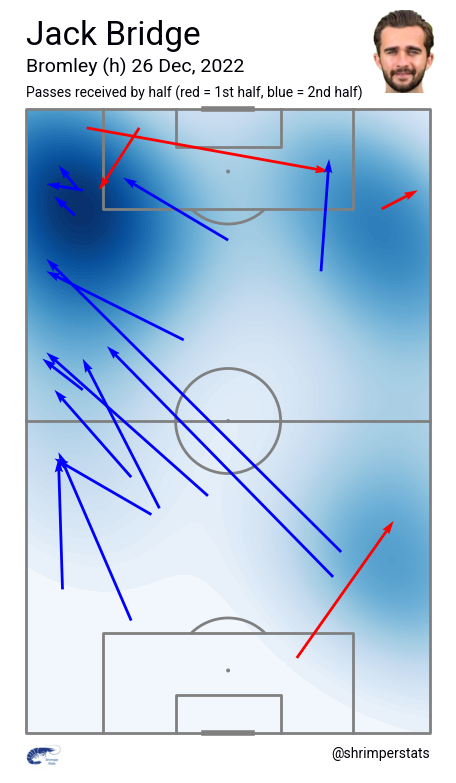

In [14]:
from wyscout.viz.viz import player_heat_map_for_match
player_heat_map_for_match(
    J_BRIDGE,
    SOUTHEND,
    5369039,
    show_passes=False,
    show_passes_received=True,
    highlight_by_half=True,
    subtitle="Passes received by half (red = 1st half, blue = 2nd half)")

## Get count of events by player

In [ ]:
matches = get_team_matches(SOUTHEND, SEASON_2022)
types = []
s_types = []
recoveries = {}
for m in matches["matches"]:
    evnts = get_match_events(m["matchId"])
    types.extend([e["type"]["primary"] for e in evnts["events"]])
    s_types.extend([e["type"]["secondary"] for e in evnts["events"]])

    for e in evnts["events"]:
        if e["type"]["primary"] == "pass":
            print(e)
            break
        if e["team"]["id"] == SOUTHEND and "recovery" in e["type"]["secondary"] and e["location"]["x"] >= 50:
            if e["player"]["name"] not in recoveries:
                recoveries[e["player"]["name"]] = 0
            recoveries[e["player"]["name"]] += 1
            

for player, val in sorted(recoveries.items(), key=lambda item: item[1], reverse=True)[:5]:
    print(player, val)

/home/vscode/.cache/pypoetry/virtualenvs/sufc-stats--ixh6ZGa-py3.10/lib/python3.10/site-packages/mplsoccer/_pitch_plot.py:172: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


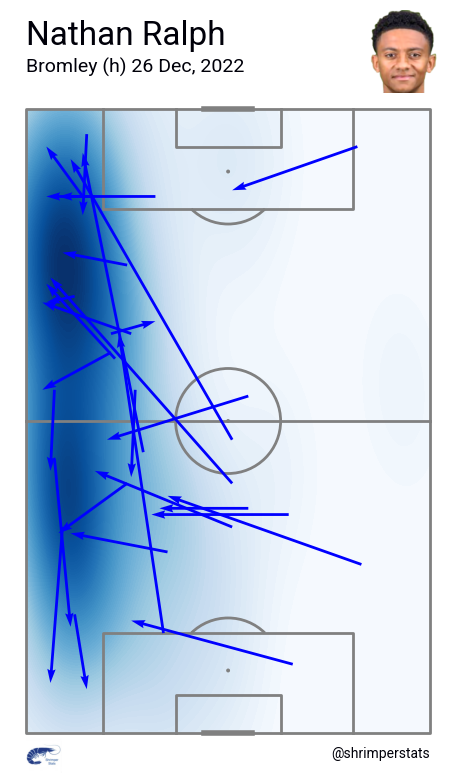

In [60]:
from wyscout.viz.viz import player_heat_map_for_match
player_heat_map_for_match(
    10560,SOUTHEND,5369039,
    show_passes=False,
    show_crosses=False,
    show_passes_received=True,
    period=None)

In [ ]:
from wyscout.viz.viz import player_pass_map_for_season
player_pass_map_for_season(
    J_BRIDGE,
    S_HOBSON,
    SOUTHEND,
    SEASON_2022,
    subtitle="Pass map")

In [9]:
from wyscout.stats import get_match_events_for_season, get_touches_for_player
team_id, season_id = SOUTHEND, SEASON_2022
matches = get_match_events_for_season(team_id, season_id)

squad = get_team_squad(team_id, season_id)
squad = {p["wyId"]: p for p in squad["squad"]}

In [10]:
all_events = [e for m in matches for e in m["events"]]
evnts = [e for e in all_events if e["type"]["primary"] == "pass" and e["player"]["id"] == S_HOBSON and e["pass"]["recipient"]["id"] == J_BRIDGE]

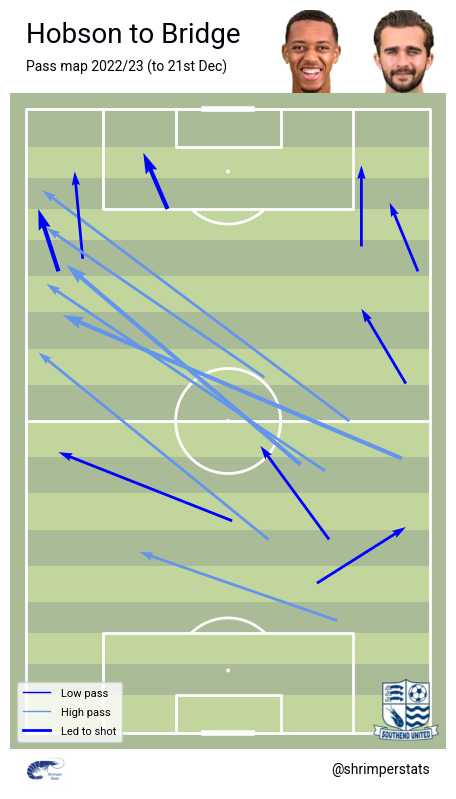

In [55]:
from wyscout.viz.viz import player_pass_map_for_season
player_pass_map_for_season(S_HOBSON, J_BRIDGE, SOUTHEND, SEASON_2022,
    subtitle=["Pass map 2022/23 (to 21st Dec)"]
)

In [29]:
from wyscout.stats import get_match_events_for_season, get_touches_for_player

NOTTS_C = 5368956
team_id = SOUTHEND
season_id = SEASON_2022

matches = get_match_events_for_season(team_id, season_id)

events = [m for m in matches if m["matchId"] == NOTTS_C][0]["events"]

In [29]:
from wyscout.stats import get_match_events_for_season, get_touches_for_player
from wyscout.viz.viz import pass_heat_map_for_match
match_id = 5369039
team_id = SOUTHEND
season_id = SEASON_2022
match_details = get_match_details(match_id)
matches = get_match_events_for_season(team_id, season_id)
filtered_matches = [m for m in matches if m["matchId"] == match_id]
match = filtered_matches[0]

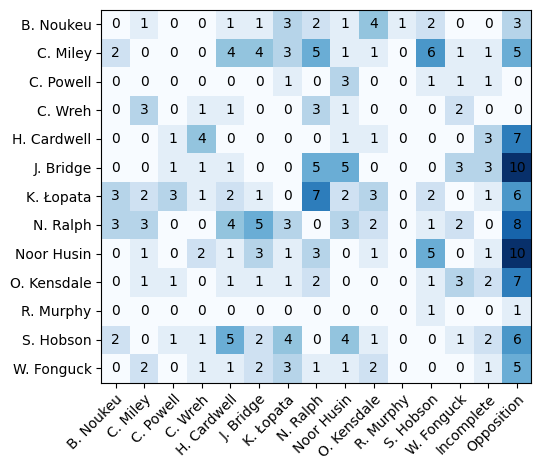

defaultdict(int,
            {'W. Fonguck': 2,
             'J. Bridge': 5,
             'O. Kensdale': 2,
             'H. Cardwell': 4,
             'C. Miley': 3,
             'Opposition': 8,
             'K. Łopata': 3,
             'B. Noukeu': 3,
             'S. Hobson': 1,
             'Noor Husin': 3,
             'C. Powell': 0,
             'C. Wreh': 0,
             'N. Ralph': 0,
             'R. Murphy': 0,
             'Incomplete': 0})

In [82]:
passes, players = pass_heat_map_for_match(team_id, match_id)

In [ ]:
evnts = [e for e in match["events"] if e["type"]["primary"] == "pass"]
ralph_events = [e for e in evnts if e["player"]["id"] == 10560]
# ralph_events[0]
for e in ralph_events:
#    print(e["type"]["primary"], e["type"]["secondary"], e["location"]["x"], e["location"]["y"])
   print(e["id"], e["type"]["primary"], e["pass"]["recipient"]["name"], e["pass"], e["location"]["x"], e["location"]["y"])